# PROJET PYTHON

### Solène ISSANES et Pauline BASON

#  

# INTRODUCTION

#  

# IMPORTATION DES DONNEES

In [47]:
#importation des librairies
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from pylab import *
import pandas as pd
import seaborn as sns

In [48]:
#importation du fichier :
coraux = pd.read_csv('coraux.txt', delimiter = ';')

#affichage des premières lignes :
print(coraux.head())

print("------------------------------------------------------------")

#affichage de l'ensemble des variables :
print(coraux.columns)

   Espece  Origine Taux_calcif  Saturation_CaCO3 Temperature  \
0       1        1        0,45                95          23   
1       1        2        0,46                97        22,9   
2       1        2         0,5                98          23   
3       1        2        0,54                96        23,1   
4       2        1        0,56                92          23   

  Concentration_Phosphates Concentration_Nitrates  Concentration_Silicium  \
0                        1                      5                       9   
1                      0,1                      5                       9   
2                        1                      5                       8   
3                      0,1                      5                       7   
4                      0,1                      5                      10   

   Irradiance  Courant   pH  
0         100        0  7,2  
1         100        0    8  
2         100        0  7,2  
3         100        0    8  
4 

#  

# FORMATAGE DES DONNEES

In [49]:
#nouveau jeu de données
df = coraux


#1) variables quantitative

#Saturation en CaCO3 dans l'eau ; Concentration en Silicium Si ; Irradiance sont des entiers

#passage d'un nombre entier en un nombre décimales :
df["Taux_calcif"] = pd.to_numeric(df["Taux_calcif"].str.replace(',', '.'))
df["Temperature"] = pd.to_numeric(df["Temperature"].str.replace(',', '.'))
df["Concentration_Phosphates"] = pd.to_numeric(df["Concentration_Phosphates"].str.replace(',', '.'))
df["Concentration_Nitrates"] = pd.to_numeric(df["Concentration_Nitrates"].str.replace(',', '.'))
df["pH"] = pd.to_numeric(df["pH"].str.replace(',', '.'))

df.dtypes

Espece                        int64
Origine                       int64
Taux_calcif                 float64
Saturation_CaCO3              int64
Temperature                 float64
Concentration_Phosphates    float64
Concentration_Nitrates      float64
Concentration_Silicium        int64
Irradiance                    int64
Courant                       int64
pH                          float64
dtype: object

In [50]:
#2) variables qualitatives

#espece
t1 = len(df['Espece'])
esp = []

for i in range(0, t1) :

    if df['Espece'][i] == 1 :
        esp.append('Stylophora pistillata')
        
    if df['Espece'][i] == 2 :
        esp.append('Porites')
        
    if df['Espece'][i] == 3 :
        esp.append('Acropora')

df['Espece'] = esp        



# origine du corail
t2 = len(df['Origine'])
ori = []

for i in range(0, t2) :
    
    if df['Origine'][i] == 1 :
        ori.append('Culture')
        
    if df['Origine'][i] == 2 :
        ori.append('Preleve in situ')
        
df['Origine'] = ori



# courant
t3 = len(df['Courant'])
cour = []

for i in range(0, t3) :
    
    if df['Courant'][i] == 0 :
        cour.append('Faible')
        
    if df['Courant'][i] == 1 :
        cour.append('Fort')
        
df['Courant'] = cour

In [51]:
#ainsi, on a :
print(df.dtypes)
print("------------------------------------------------------------")
print(df.head())

Espece                       object
Origine                      object
Taux_calcif                 float64
Saturation_CaCO3              int64
Temperature                 float64
Concentration_Phosphates    float64
Concentration_Nitrates      float64
Concentration_Silicium        int64
Irradiance                    int64
Courant                      object
pH                          float64
dtype: object
------------------------------------------------------------
                  Espece          Origine  Taux_calcif  Saturation_CaCO3  \
0  Stylophora pistillata          Culture         0.45                95   
1  Stylophora pistillata  Preleve in situ         0.46                97   
2  Stylophora pistillata  Preleve in situ         0.50                98   
3  Stylophora pistillata  Preleve in situ         0.54                96   
4                Porites          Culture         0.56                92   

   Temperature  Concentration_Phosphates  Concentration_Nitrates  \
0   

#  

# ANALYSE UNIVARIE

### Statistiques descriptives

In [52]:
print(" Variables quantitatives :")
print(df.describe())

print("------------------------------------------------------------")
print(" Variables qualitatives :")
print(df['Espece'].value_counts())
print(df['Origine'].value_counts())
print(df['Courant'].value_counts())

 Variables quantitatives :
       Taux_calcif  Saturation_CaCO3  Temperature  Concentration_Phosphates  \
count    95.000000         95.000000    95.000000                 95.000000   
mean      1.366000        252.631579    25.542105                  0.530526   
std       0.484301         94.038816     1.287797                  0.283996   
min       0.450000         88.000000    22.900000                  0.100000   
25%       0.970000        183.500000    24.550000                  0.300000   
50%       1.460000        263.000000    25.900000                  0.500000   
75%       1.785000        322.000000    26.650000                  0.800000   
max       2.120000        430.000000    27.200000                  1.000000   

       Concentration_Nitrates  Concentration_Silicium  Irradiance         pH  
count               95.000000               95.000000   95.000000  95.000000  
mean                 2.015789                8.484211  344.210526   7.562105  
std                  1.7

### Représentation graphique 

<function matplotlib.pyplot.show(*args, **kw)>

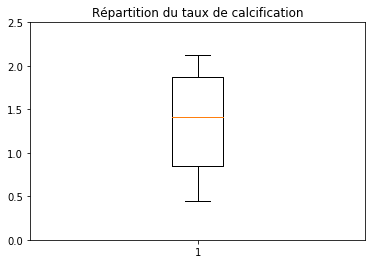

In [57]:
#taux de calcification
plt.boxplot(df['Taux_calcif'].describe())
plt.ylim(0,2.5)
plt. title("Répartition du taux de calcification")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

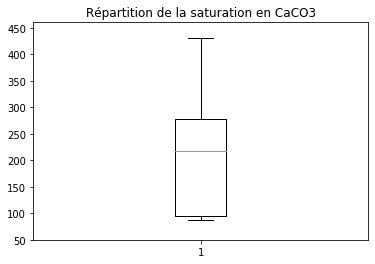

In [58]:
#saturation en CaCO3
plt.boxplot(df['Saturation_CaCO3'].describe())
plt.ylim(50,460)
plt. title("Répartition de la saturation en CaCO3")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

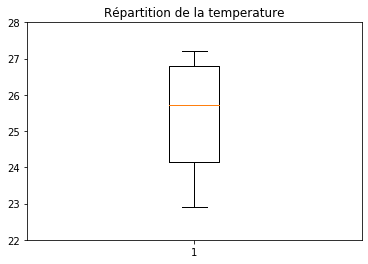

In [61]:
#temperature
plt.boxplot(df['Temperature'].describe())
plt.ylim(22,28)
plt. title("Répartition de la temperature")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

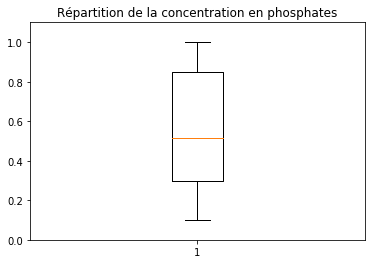

In [63]:
#concentration en phosphates
plt.boxplot(df['Concentration_Phosphates'].describe())
plt.ylim(0,1.1)
plt. title("Répartition de la concentration en phosphates")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

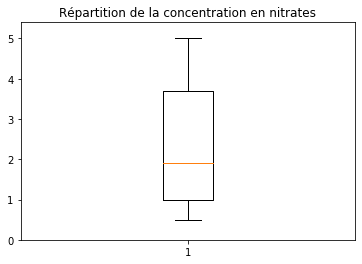

In [67]:
#concentration en nitrates
plt.boxplot(df['Concentration_Nitrates'].describe())
plt.ylim(0,5.4)
plt. title("Répartition de la concentration en nitrates")
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

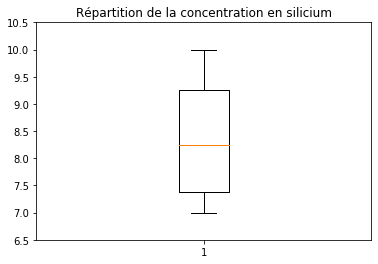

In [69]:
#concentration en silicium
plt.boxplot(df['Concentration_Silicium'].describe())
plt.ylim(6.5,10.5)
plt. title("Répartition de la concentration en silicium")
plt.show

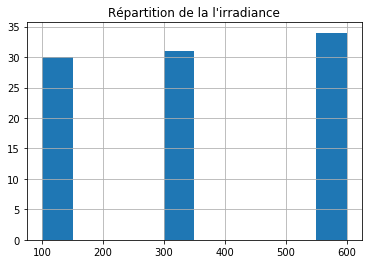

In [81]:
#irradiance
df['Irradiance'].hist()
plt. title("Répartition de la l'irradiance")
plt.show()

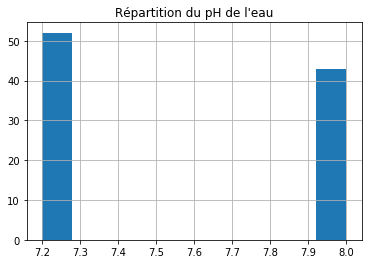

In [82]:
#pH de l'eau
df['pH'].hist()
plt. title("Répartition du pH de l'eau")
plt.show()

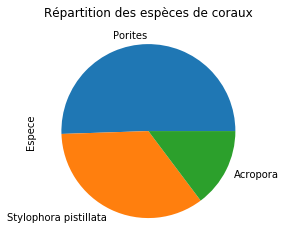

In [88]:
#espece
df["Espece"].value_counts(normalize=True).plot(kind='pie')
plt. title("Répartition des espèces de coraux")
plt.show()

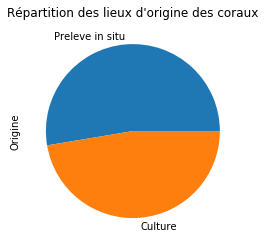

In [89]:
#origine
df["Origine"].value_counts(normalize=True).plot(kind='pie')
plt. title("Répartition des lieux d'origine des coraux")
plt.show()

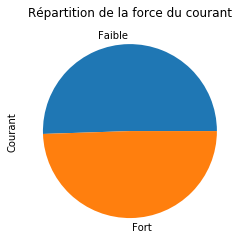

In [90]:
#courant
df["Courant"].value_counts(normalize=True).plot(kind='pie')
plt. title("Répartition de la force du courant")
plt.show()

#  

# ANALYSE BIVARIE AVEC LA VARIABLE D'INTERET

### Analyse du groupe d'espèce

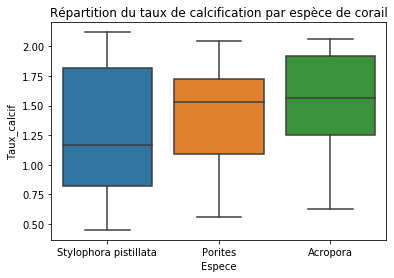

In [114]:
#boite à moustache
sns.boxplot(df['Espece'], df['Taux_calcif'], data=df)
plt.title("Répartition du taux de calcification par espèce de corail")
plt.show()

In [123]:
#librairie
from scipy import stats

#shapiro
shapiro_test = stats.shapiro(df[ "Taux_calcif"])

#affichage
print("La p-value est : " , shapiro_test[1])

La p-value est :  0.0006908565410412848


In [122]:
#Préparation des groupes
stylo_pistillata = []
porites = []
acropora = []

for i in range(len(df))  : #(pour chaque ligne)
    
    if (df['Espece'][i] == "Stylophora pistillata") :
      stylo_pistillata.append(df['Taux_calcif'][i])
    
    if (df['Espece'][i] == "Porites") :
      porites.append(df['Taux_calcif'][i])
    
    if (df['Espece'][i] == "Acropora") :
      acropora.append(df['Taux_calcif'][i])
    

#Test de Kruskal et Wallis
kruskal_t,kruskal_pvalue = stats.kruskal(stylo_pistillata, porites, acropora)
print(f'Kruskal-Wallis test : statistique = {kruskal_t} ; pvalue = {kruskal_pvalue}')

Kruskal-Wallis test : statistique = 2.43526190358008 ; pvalue = 0.2959304105504433


######   

### Analyse des variables qualitatives

##### Lieu d'origine du corail

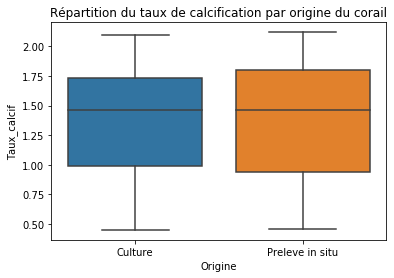

In [127]:
#boite à moustache
sns.boxplot(df['Origine'], df['Taux_calcif'], data=df)
plt.title("Répartition du taux de calcification par origine du corail")
plt.show()

In [130]:
#Préparation des groupes
cult = []
in_situ = []

for i in range(len(df))  : #(pour chaque ligne)
    
    if (df['Origine'][i] == "Culture") :
      cult.append(df['Taux_calcif'][i])
    
    if (df['Origine'][i] == "Preleve in situ") :
      in_situ.append(df['Taux_calcif'][i])
    
    

#Test d'Anova (car 2 modalités)
anova_t,anova_pvalue = stats.f_oneway(cult, in_situ)
print(f'Anova test : statistique = {anova_t} ; pvalue = {anova_pvalue}')

Anova test : statistique = 1.781005093845615e-05 ; pvalue = 0.9966418205207427


##### La force du courant de l'eau

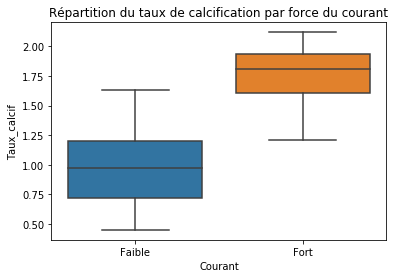

In [131]:
#boite à moustache
sns.boxplot(df['Courant'], df['Taux_calcif'], data=df)
plt.title("Répartition du taux de calcification par force du courant")
plt.show()

In [132]:
#Préparation des groupes
faib = []
fort = []

for i in range(len(df))  : #(pour chaque ligne)
    
    if (df['Courant'][i] == "Faible") :
      faib.append(df['Taux_calcif'][i])
    
    if (df['Courant'][i] == "Fort") :
      fort.append(df['Taux_calcif'][i])
    
    
    
#Test d'Anova (car 2 modalités)
anova_t,anova_pvalue = stats.f_oneway(faib, fort)
print(f'Anova test : statistique = {anova_t} ; pvalue = {anova_pvalue}')

Anova test : statistique = 186.31196163521426 ; pvalue = 6.215783575677202e-24


######  

### Analyse des variables quantitatives

##### La saturation en CaCO3

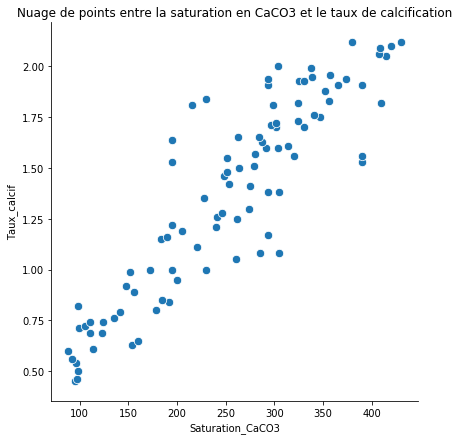

In [135]:
### Saturation en CaCO3 et taux de calcification
sns.relplot(x='Saturation_CaCO3', y="Taux_calcif", data=df,height=6,s=70) ;
plt.title('Nuage de points entre la saturation en CaCO3 et le taux de calcification')
plt.show()

In [140]:
#coefficient de correlation
from scipy.stats import pearsonr
corr, _ = pearsonr(df['Saturation_CaCO3'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Coefficient de corrélation de Pearson :  0.899


##### La température

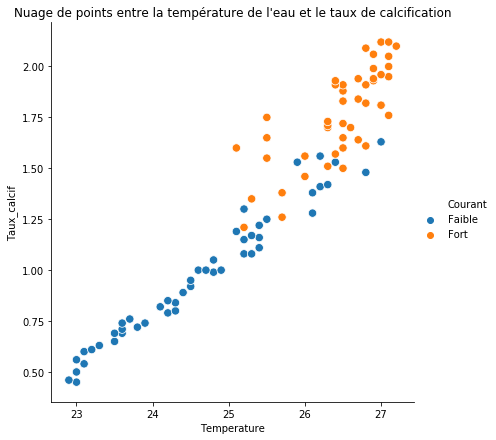

In [165]:
### Température et taux de calcification
sns.relplot(x='Temperature',y="Taux_calcif",data=df,  height=6,s=70) ;
plt.title("Nuage de points entre la température de l'eau et le taux de calcification")
plt.show()

In [153]:
#coefficient de correlation
corr, _ = pearsonr(df['Temperature'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Coefficient de corrélation de Pearson :  0.955


##### Concentration en Phosphates

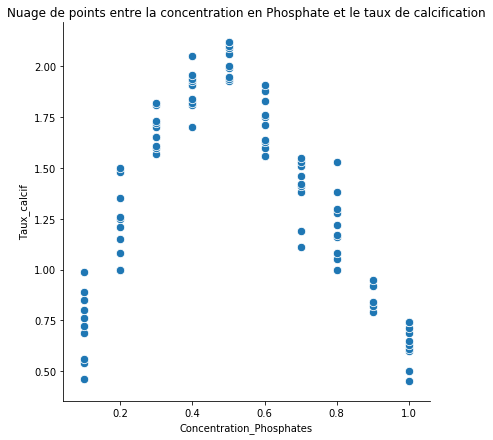

In [137]:
### Concentration_Phosphates et taux de calcification
sns.relplot(x='Concentration_Phosphates',y="Taux_calcif",data=df,height=6,s=70) ;
plt.title("Nuage de points entre la concentration en Phosphate et le taux de calcification")
plt.show()

In [146]:
print("Visuellement, on voit que la relation est non-linéaire et non-monotone")
#coefficient de correlation
corr, _ = pearsonr(df['Concentration_Phosphates'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Visuellement, on voit que la relation est non-linéaire et non-monotone
Coefficient de corrélation de Pearson :  -0.222


##### Concentration en nitrates

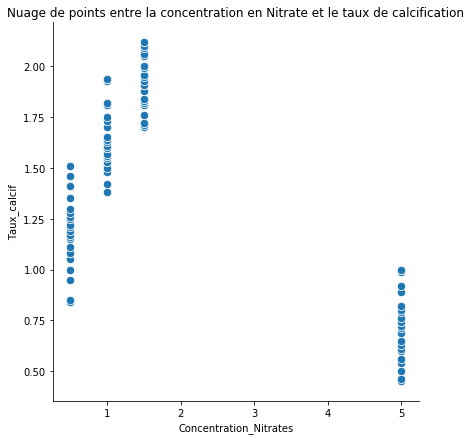

In [150]:
### Concentration_Nitrates et taux de calcification
sns.relplot(x='Concentration_Nitrates',y="Taux_calcif",data=df,height=6,s=70) ;
plt.title("Nuage de points entre la concentration en Nitrate et le taux de calcification")
plt.show()

In [154]:
print("Visuellement, on voit que la relation est non-linéaire et non-monotone")
#coefficient de correlation
corr, _ = pearsonr(df['Concentration_Nitrates'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Visuellement, on voit que la relation est non-linéaire et non-monotone
Coefficient de corrélation de Pearson :  -0.663


##### Concentration_Silicium

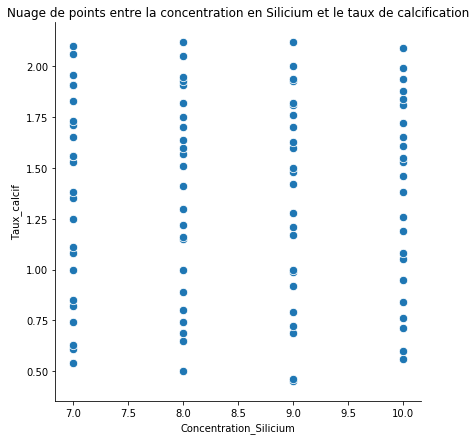

In [156]:
### Concentration_Silicium
sns.relplot(x='Concentration_Silicium',y="Taux_calcif",data=df,height=6,s=70) ;
plt.title("Nuage de points entre la concentration en Silicium et le taux de calcification")
plt.show()

In [158]:
print("Visuellement, on voit qu'il y a une absence de relation")
#coefficient de correlation
corr, _ = pearsonr(df['Concentration_Silicium'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Visuellement, on voit qu'il y a une absence de relation
Coefficient de corrélation de Pearson :  -0.008


##### Irradiance

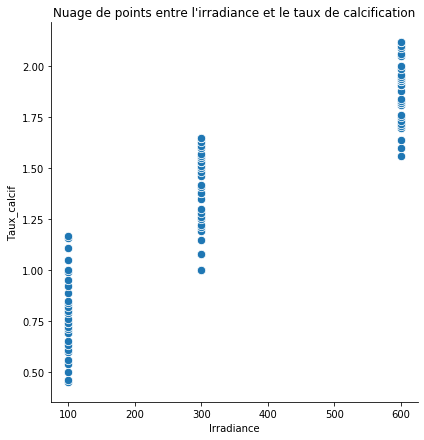

In [160]:
### Irradiance
sns.relplot(x='Irradiance',y="Taux_calcif",data=df,height=6,s=70) ;
plt.title("Nuage de points entre l'irradiance et le taux de calcification")
plt.show()

In [161]:
#coefficient de correlation
corr, _ = pearsonr(df['Irradiance'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Coefficient de corrélation de Pearson :  0.914


##### pH de l'eau

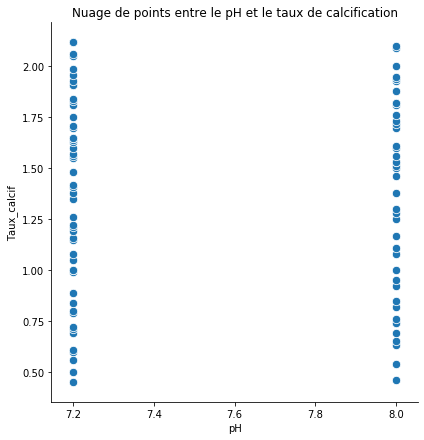

In [162]:
### pH
sns.relplot(x='pH',y="Taux_calcif",data=df,height=6,s=70) ;
plt.title("Nuage de points entre le pH et le taux de calcification")
plt.show()

In [164]:
print("Visuellement, on voit qu'il y a une absence de relation")
#coefficient de correlation
corr, _ = pearsonr(df['pH'], df["Taux_calcif"])
print("Coefficient de corrélation de Pearson : ", round(corr,3))

Visuellement, on voit qu'il y a une absence de relation
Coefficient de corrélation de Pearson :  0.003


##### variables qualitatives

   Taux_calcif  Saturation_CaCO3  Temperature  Concentration_Nitrates  \
0         0.45                95         23.0                     5.0   
1         0.46                97         22.9                     5.0   
2         0.50                98         23.0                     5.0   
3         0.54                96         23.1                     5.0   
4         0.56                92         23.0                     5.0   

   Irradiance Courant  
0         100  Faible  
1         100  Faible  
2         100  Faible  
3         100  Faible  
4         100  Faible  


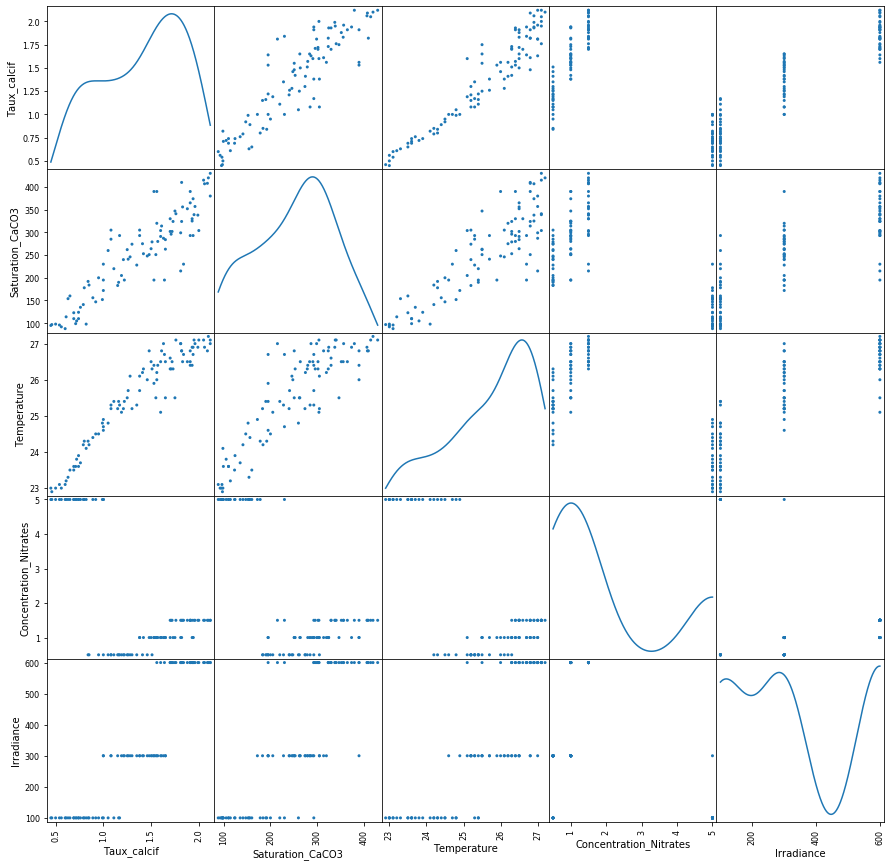

In [171]:
#hue = "Courant"
df1 = df[["Taux_calcif","Saturation_CaCO3", "Temperature", "Concentration_Nitrates", "Irradiance", "Courant"]]
print(df1.head())

#matrice nuage de point
from pandas.plotting import scatter_matrix
scatter_matrix(df1, alpha=1, figsize=(15, 15), diagonal='kde')
plt.show()